# I. Introduction to Scikit-learn

### Step 1. Import the necessary libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Step 2. Import one of the toy datasets (digits) from Scikitlearn
This is a copy of the test set of the UCI ML hand-written digits datasets https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where each class refers to a digit.

Each datapoint is a 8x8 image of a digit, Classes=10, Samples per class~180, 

Samples total=1797, Dimensionality=64, and Features=(integers 0-16)


After importing this dataset, split it into test and train sets. You may check the shape of data and the target attributes of the dataset. You may also want to print a few samples from the dataset.

In [3]:
from sklearn.datasets import load_digits
dataset_digits=load_digits()
dataset_digits.keys()


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
import pandas as pd
df=pd.DataFrame(dataset_digits["data"])
df.head(5)


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [4]:
dataset_digits["target_names"]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# II. Sklearn API for model training
-------------------
### Step 1. Import your model class

As an example, let us `LinearSVC`, a linear support vector classifier. This classifier is imprted from `sklearn.svm` module which includes Support Vector Machine algorithms.

In [9]:
from sklearn.svm import LinearSVC


### Step2. Instantiate an object and set the parameters

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(dataset_digits['data'], dataset_digits['target'])

### Step 3. Fit the model
When fitting the model, use the train dataset.

In [16]:
LinearSVC()
y=LinearSVC().fit(X_train, y_train)

### Step 4. Predict and Evaluate
Use the test set for this purpose, for now.

In [19]:
y.predict(X_test)
y.score
print("Accuracy on training set: {:.3f}".format(y.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(y.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.947


What happens with the cross validation?


In [43]:
cancer_data=load_breast_cancer()
from sklearn.preprocessing import scale
cancer_data.keys()

X,y= cancer_data.data, cancer_data.target
X=scale(X)

X_trainval, X_test, y_trainval, y_test=train_test_split(X,y)
X_train, X_val, y_train, y_val=train_test_split(X_trainval, y_trainval)
print( "length: ", len(X), len(X_trainval),  len(X_train), len(X_val), len(X_test),)
print( "length: ", len(X), len(X_trainval)/len(X)*100,  len(X_train)/len(X)*100, len(X_val)/len(X)*100, len(X_test)/len(X)*100)

length:  569 426 319 107 143
length:  569 74.86818980667839 56.06326889279437 18.804920913884008 25.13181019332162


In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

print("Train: {: .3f} ".format(knn.score(X_train,y_train)))
print("Validation: {: .3f} ".format(knn.score(X_val,y_val)))
print("Test: {: .3f} ".format(knn.score(X_test,y_test)))


Train:  0.981 
Validation:  0.944 
Test:  0.972 


In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)

print("Train: {: .3f} ".format(knn.score(X_train,y_train)))
print("Validation: {: .3f} ".format(knn.score(X_val,y_val)))
print("Test: {: .3f} ".format(knn.score(X_test,y_test)))

Train:  1.000 
Validation:  0.944 
Test:  0.951 


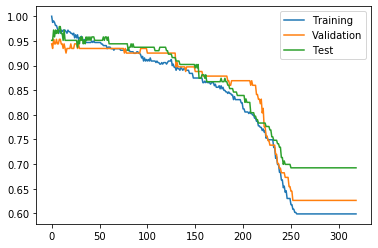

In [84]:
from sklearn.neighbors import KNeighborsClassifier
d=[]
#d={'Training':[], 'Validation':[], 'Test': []}
    # print("for : " , n )
    # print("Train : {: .3f} ".format(knn.score(X_train,y_train)) )
    # print("Validation: {: .3f} ".format(knn.score(X_val,y_val)))
    # print("Test: {: .3f} ".format(knn.score(X_test,y_test)))

for i in range(len(X_train)): 
    for j to range(1000):
        rng=np.random.RandomState(j)
        noise=rng.normal(scale=.1, size=X_train.shape)
        knn=KNeighborsClassifier(n_neighbors=i+1).fit(X_train + noise, y_train)
        d.append({
            'Training' : knn.score(X_train,y_train),
            'Validation' : knn.score(X_val,y_val),
            'Test' : knn.score(X_test,y_test)
        })

import matplotlib.pyplot as plt
TrainingScore= pd.DataFrame(d)
TrainingScore.plot()


In [ ]:

for i in range(len(X_train)): 
    for j to range(1000):
        rng=np.random.RandomState(j)
        noise=rng.normal(scale=.1, size=X_train.shape)
        knn=KNeighborsClassifier(n_neighbors=i+1).fit(X_train + noise, y_train)
        d.append({
            'Training' : knn.score(X_train,y_train),
            'Validation' : knn.score(X_val,y_val),
            'Test' : knn.score(X_test,y_test)
        })

import matplotlib.pyplot as plt
TrainingScore= pd.DataFrame(d)
TrainingScore.plot()


In [20]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.840


The accuracy on the training set is 100%—because the leaves are pure, the tree was grown deep enough that it could perfectly memorize all the labels on the training data. If we select max depth 4, 

In [21]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.605
Accuracy on test set: 0.544


# Visualise

In [34]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["1", "2"],
                feature_names=dataset_digits.feature_names, impurity=False, filled=True)

        

AttributeError: feature_names

In [28]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

In [33]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

ModuleNotFoundError: No module named 'graphviz'

### Step5. Try another Algorithm
Try `RandomForestCLassifier` this time, import it from `sklearn.ensemble` module.

# II. Cross-validation

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test. 

When evaluating different settings (“hyperparameters”) for estimators, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.

However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.

A solution to this problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”:

A model is trained using  of the folds as training data; the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data (as is the case when fixing an arbitrary validation set), which is a major advantage in problems such as inverse inference where the number of samples is very small.
(Check https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)

Grid Searches
=================
Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a “fit” and a “score” method. It also implements “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

See (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

Grid-Search with build-in cross validation

A GridSearchCV object behaves just like a normal classifier.